In [1]:
import matplotlib.pyplot as plt
import numpy as np
from time import time
import csv
from tabulate import tabulate
import scipy.stats as stats
%matplotlib inline

# Data Handling

In [8]:
horizon_10 = ['noret', 'all', 'old_2', 'traf_2', 'betw_weight_50',  'clust_50',  'mod_weighted_50']
horizon_20 = ['noret', 'all', 'old_3', 'traf_3', 'betw_weight_100', 'clust_100', 'mod_weighted_100']
horizon_50 = ['noret', 'all', 'old_4', 'traf_4', 'betw_weight_250', 'clust_250' ]
strategies = horizon_10 + horizon_20[2:] + horizon_50[2:]

vmt = {}
#total_time = {}
trips = {}
#tt_per_trip = {}
vmt_per_trip = {}

for strat in strategies:
    vmt[strat] = []
    #total_time[strat] = []
    trips[strat] = []
    #tt_per_trip[strat] = []
    vmt_per_trip[strat] = []

output_filenames  = ['traffic_output_GB.csv', 'traffic_output_RY_06_11.csv', 'quick_traffic_model/traffic_output_norets_RY_0609.csv',
                     'quick_traffic_model/traffic_output_allrets_RY_0609.csv', 'traffic_output_betw_weight.csv']

for filename in output_filenames:
    with open(filename, 'r') as output_file:
        reader = csv.reader(output_file)
        next(reader)
        for row in reader:
            pkl_file = row[1]
            for strat in strategies:
                if strat in pkl_file:
                    vmt_orig = float(row[4])
                    vmt_new = float(row[5])
                    #tt_orig = float(row[2])
                    #tt_new = float(row[3])
                    trips_orig = float(row[7])
                    trips_new = float(row[6])
                    
                    vmt[strat].append(100*(vmt_new/vmt_orig - 1))
                    #total_time[strat].append(100*(tt_new/tt_orig - 1))
                    trips[strat].append(100 * (trips_new/trips_orig))
                    vmt_per_trip[strat].append(100*((vmt_new/trips_new)/(vmt_orig/trips_orig) - 1))
                    #tt_per_trip[strat].append(100*((tt_new/trips_new)/(tt_orig/trips_orig) - 1))
                    break

full_titles = {'noret': 'No Retrofits Baseline',
               'all': 'All Retrofits', 
               'old_2': 'Oldest Bridges Ranking 50', 
               'traf_2': 'Highest-Traffic Ranking 50', 
               'betw_weight_50': 'Betweenness Strategy 50', 
               'clust_50': 'Local Clustering Strategy 50', 
               'mod_weighted_50': 'High Modularity Strategy 50', # 10yr
               'old_3': 'Oldest Bridges Ranking 100', 
               'traf_3': 'Highest-Traffic Ranking 100', 
               'betw_weight_100': 'Betweenness Strategy 100', 
               'clust_100': 'Local Clustering Strategy 100', 
               'mod_weighted_100': 'High Modularity Strategy 100', # 20yr
               'old_4': 'Oldest Bridges Ranking 250', 
               'traf_4': 'Highest-Traffic Ranking 250', 
               'betw_weight_250': 'Betweenness Strategy 250', 
               'clust_250': 'Local Clustering Strategy 250'}

# Scatterplot

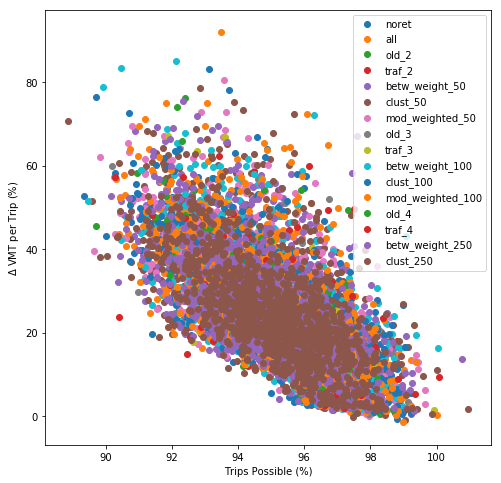

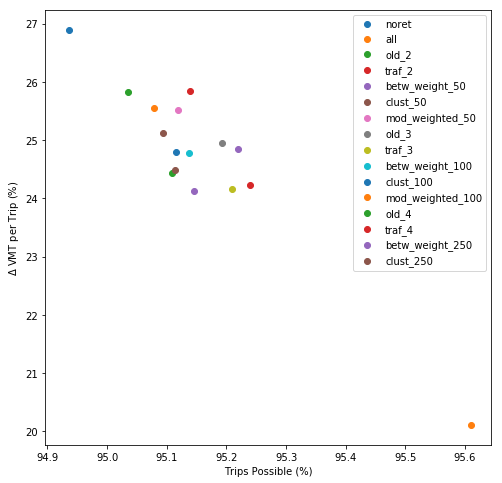

In [9]:
plt.figure(figsize=(8,8))
for strat in strategies:
    plt.scatter(trips[strat], vmt_per_trip[strat], label=strat)
plt.xlabel('Trips Possible (%)')
plt.ylabel('$\Delta$ VMT per Trip (%)')
plt.legend()
plt.show()

plt.figure(figsize=(8,8))
trip_means = np.array([np.mean(trips[strat]) for strat in strategies])
vmt_means = np.array([np.mean(vmt_per_trip[strat]) for strat in strategies])
count = 0
for strat in strategies:
    plt.scatter(trip_means[count], vmt_means[count], label=strat)
    count+=1
plt.xlabel('Trips Possible (%)')
plt.ylabel('$\Delta$ VMT per Trip (%)')
plt.legend()
plt.show()

#plt.figure(figsize=(8,8))
#for strat in strategies:
#    plt.scatter(trips[strat], tt_per_trip[strat], label=strat)
#plt.xlabel('Trips Possible (%)')
#plt.ylabel('$\Delta$ Travel Time per Trip (%)')
#plt.legend()
#plt.show()

# Stats

In [10]:
statistics = []
headers = ['tmed', 'tmean', 'tstd', 'vmt/t_med', 'vmt/t_mean', 'vmt/t_std',]

for strat in strategies:
    strat_stats = [strat]
    strat_stats.append(np.median(trips[strat]))
    strat_stats.append(np.mean(trips[strat]))
    strat_stats.append(np.std(trips[strat]))
    strat_stats.append(np.median(vmt_per_trip[strat]))
    strat_stats.append(np.mean(vmt_per_trip[strat]))
    strat_stats.append(np.std(vmt_per_trip[strat]))
    statistics.append(strat_stats)
        
print tabulate(statistics, headers)

                     tmed    tmean     tstd    vmt/t_med    vmt/t_mean    vmt/t_std
----------------  -------  -------  -------  -----------  ------------  -----------
noret             95.0774  94.9365  1.72316      25.5296       26.8883      12.7378
all               95.6633  95.6101  1.62767      18.4505       20.1092      10.1913
old_2             95.0731  95.0345  1.71179      24.1107       25.8289      12.6213
traf_2            95.0701  95.1382  1.56061      24.4941       25.838       11.6889
betw_weight_50    95.2862  95.2203  1.62797      23.5789       24.8428      11.8548
clust_50          95.1655  95.094   1.62443      23.3694       25.1145      12.2179
mod_weighted_50   95.1889  95.1197  1.68302      24.1734       25.5192      12.6141
old_3             95.1273  95.1932  1.72147      23.704        24.9483      12.2744
traf_3            95.3465  95.2093  1.61558      23.0281       24.1649      12.4131
betw_weight_100   95.1709  95.1377  1.64129      22.925        24.782       

# Ranking

In [11]:
horizons = [horizon_10, horizon_20, horizon_50]

vmt_inds = []
trip_inds = []

for horizon in horizons:
    trip_means = np.array([-np.mean(trips[strat]) for strat in horizon])
    vmt_means = np.array([np.mean(vmt_per_trip[strat]) for strat in horizon])
    trip_inds.append(np.argsort(trip_means))
    vmt_inds.append(np.argsort(vmt_means))

rankings_trips_10 = [horizon_10[trip_inds[0][j]] for j in range(len(trip_inds[0]))]
rankings_trips_20 = [horizon_20[trip_inds[1][j]] for j in range(len(trip_inds[1]))]
rankings_trips_50 = [horizon_50[trip_inds[2][j]] for j in range(len(trip_inds[2]))]

rankings_vmt_10 = [horizon_10[vmt_inds[0][j]] for j in range(len(vmt_inds[0]))]
rankings_vmt_20 = [horizon_20[vmt_inds[1][j]] for j in range(len(vmt_inds[1]))]
rankings_vmt_50 = [horizon_50[vmt_inds[2][j]] for j in range(len(vmt_inds[2]))]

print 'Trips 10yr:', rankings_trips_10
print 'Trips 20yr:', rankings_trips_20
print 'Trips 50yr:', rankings_trips_50
print ' '
print 'VMT 10yr:', rankings_vmt_10
print 'VMT 20yr:', rankings_vmt_20
print 'VMT 50yr:', rankings_vmt_50

Trips 10yr: ['all', 'betw_weight_50', 'traf_2', 'mod_weighted_50', 'clust_50', 'old_2', 'noret']
Trips 20yr: ['all', 'traf_3', 'old_3', 'betw_weight_100', 'clust_100', 'mod_weighted_100', 'noret']
Trips 50yr: ['all', 'traf_4', 'betw_weight_250', 'clust_250', 'old_4', 'noret']
 
VMT 10yr: ['all', 'betw_weight_50', 'clust_50', 'mod_weighted_50', 'old_2', 'traf_2', 'noret']
VMT 20yr: ['all', 'traf_3', 'betw_weight_100', 'clust_100', 'old_3', 'mod_weighted_100', 'noret']
VMT 50yr: ['all', 'betw_weight_250', 'traf_4', 'old_4', 'clust_250', 'noret']


# Histograms

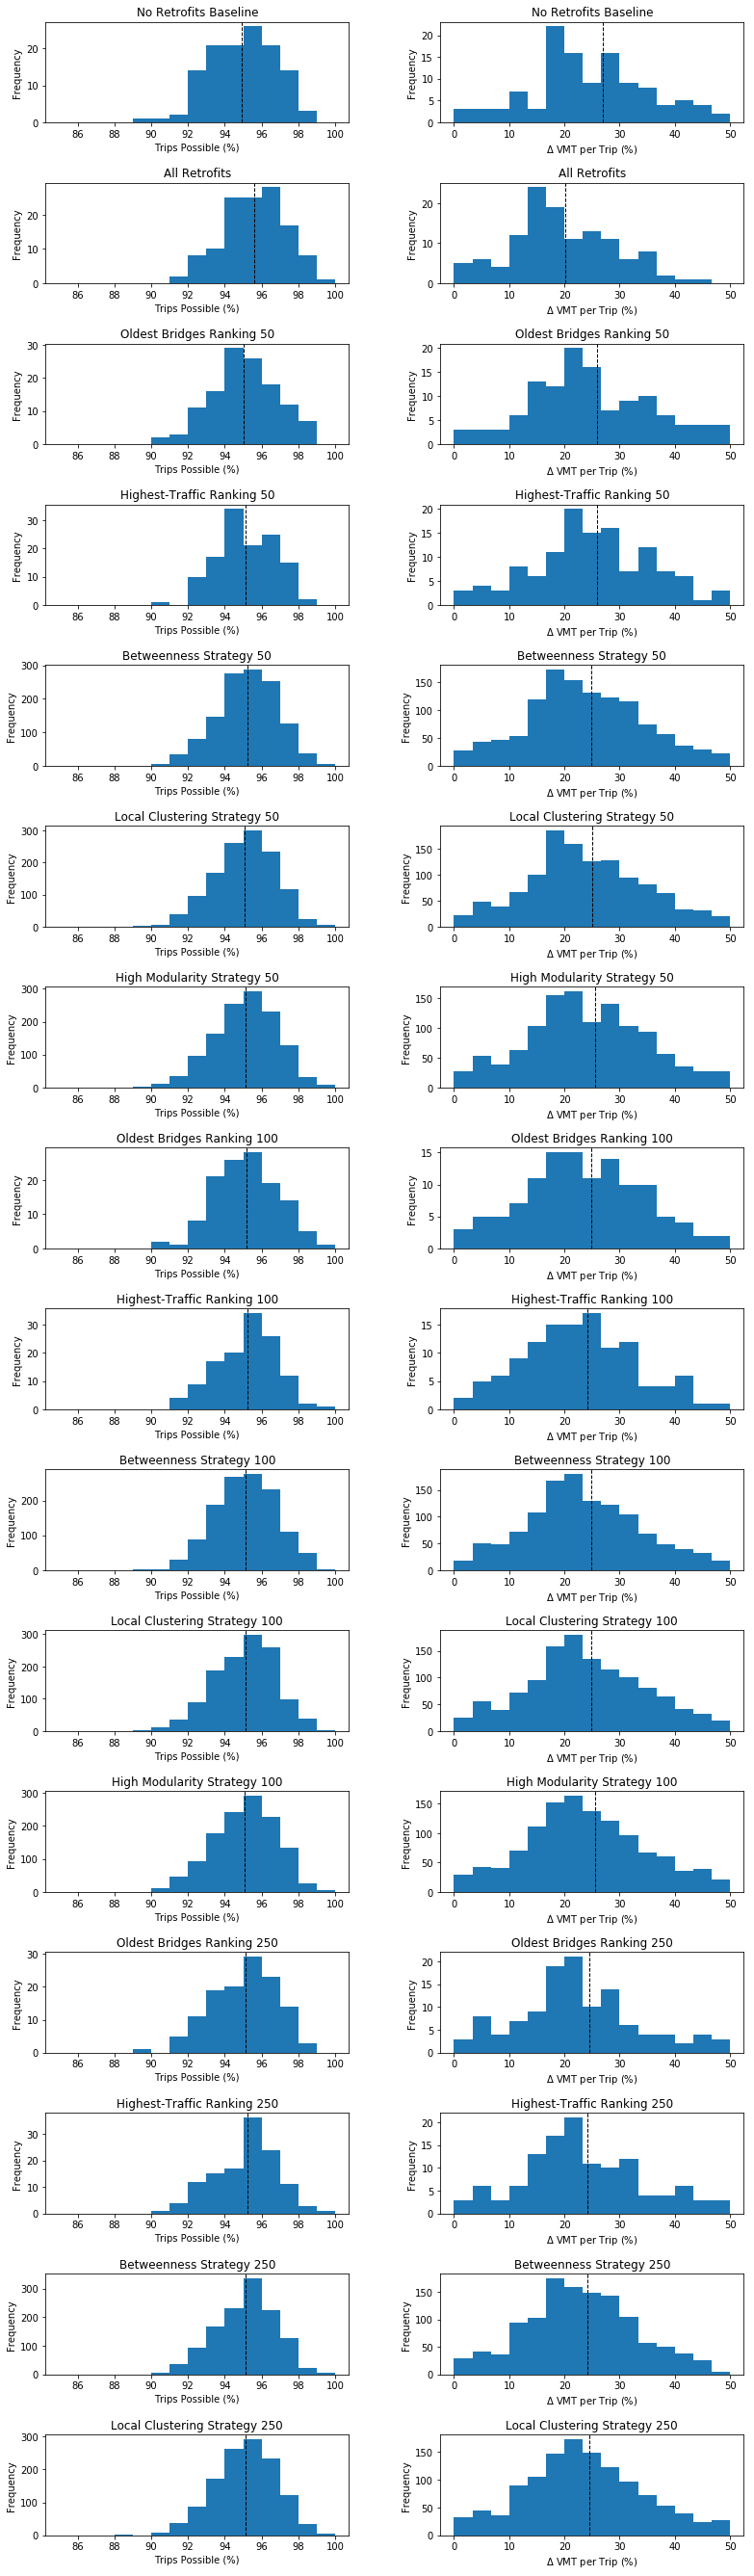

In [12]:
count = 1
plt.figure(figsize=(13,3*len(strategies)))
for strat in strategies:
    #plt.subplot(len(strategies), 3, count)
    #plt.hist(total_time[strat], range=(-100, 400), bins=15)
    #plt.title(full_titles[strat])
    #plt.xlabel('Travel Time Increase (%)')
    #plt.ylabel('Frequency')
    #plt.axvline(np.mean(total_time[strat]), color='k', linestyle='dashed', linewidth=1)
    
    plt.subplot(len(strategies), 2, count)
    plt.hist(trips[strat], range=(85, 100), bins=15)
    plt.title(full_titles[strat])
    plt.xlabel('Trips Possible (%)')
    plt.ylabel('Frequency')
    plt.axvline(np.mean(trips[strat]), color='k', linestyle='dashed', linewidth=1)
    
    plt.subplot(len(strategies), 2, count+1)
    plt.hist(vmt_per_trip[strat], range=(0, 50), bins=15)
    plt.title(full_titles[strat])
    plt.xlabel('$\Delta$ VMT per Trip (%)')
    plt.ylabel('Frequency')
    plt.axvline(np.mean(vmt_per_trip[strat]), color='k', linestyle='dashed', linewidth=1)
   
    count += 2
    
plt.subplots_adjust(hspace=.6, wspace=0.3)
plt.show()

# Boxplot

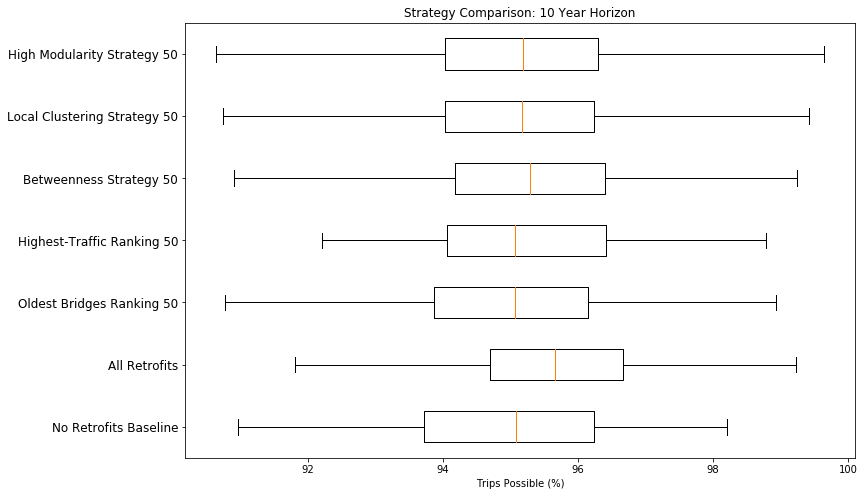

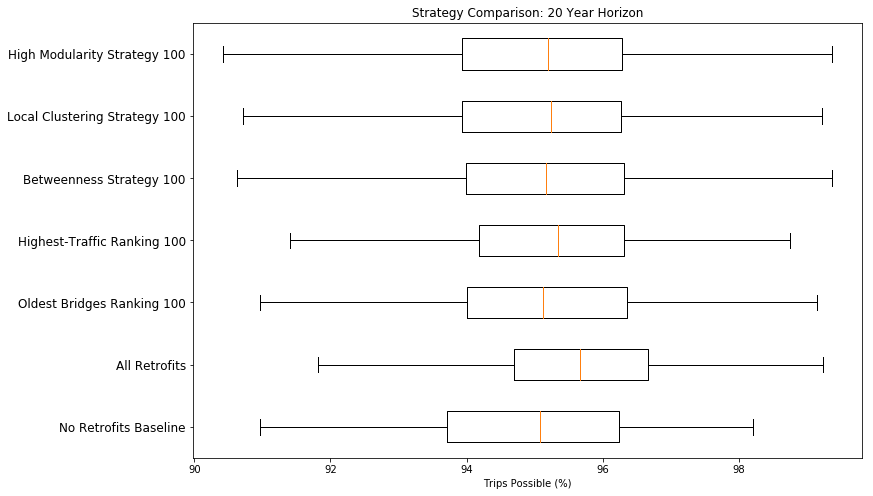

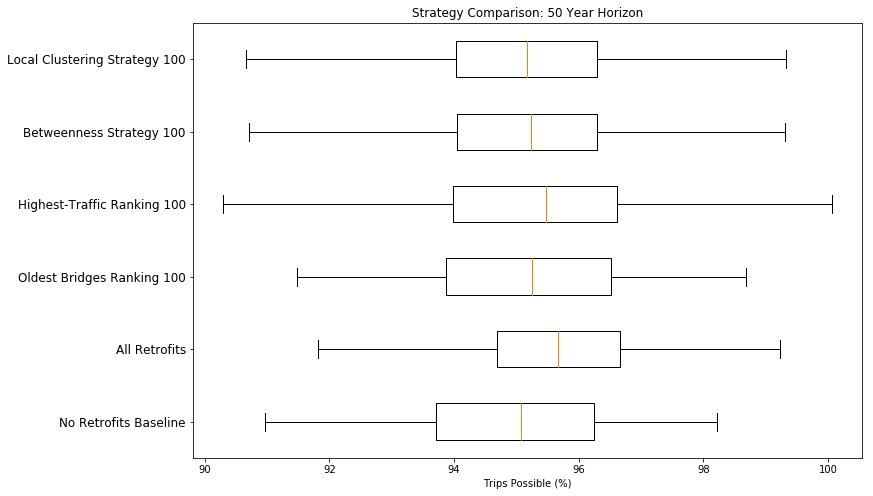

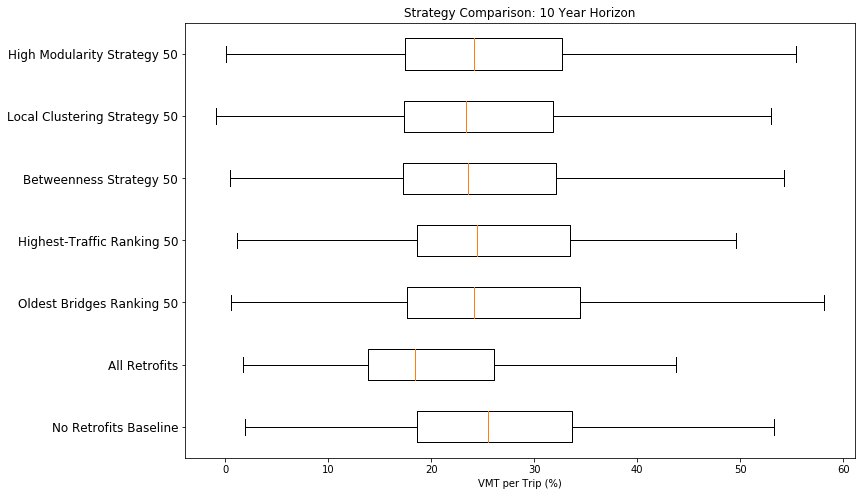

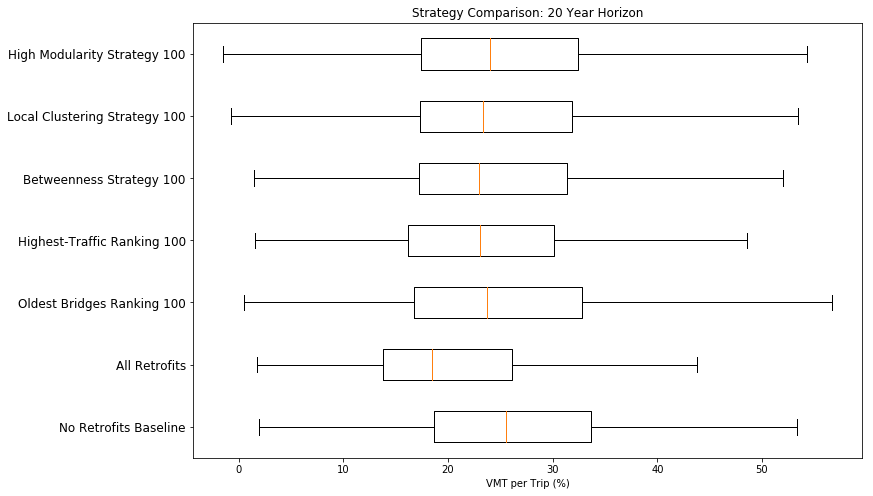

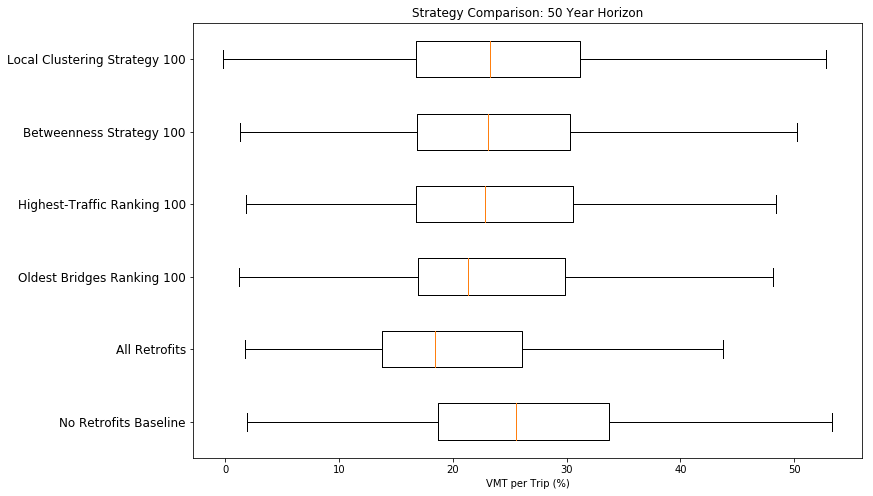

In [13]:
#plt.figure(figsize=(12, 8))
#full_data = [total_time[strat] for strat in strategies]
#plt.boxplot(full_data, 0, '')
#plt.title('Strategy Comparison')
#plt.ylabel('Travel Time Increase (%)')
#ax = plt.gca()
#titles_array = [full_titles[strat] for strat in strategies]
#ax.set_xticklabels(titles_array, rotation = 60, size=12)
#plt.show()

plt.figure(figsize=(12, 8))
full_data = [trips[strat] for strat in strategies[0:7]]
plt.boxplot(full_data, 0, '',vert=False)
plt.title('Strategy Comparison: 10 Year Horizon')
plt.xlabel('Trips Possible (%)')
ax = plt.gca()
titles_array = [full_titles[strat] for strat in strategies[0:7]]
ax.set_yticklabels(titles_array, size=12)
plt.show()

plt.figure(figsize=(12, 8))
full_data = [trips[strat] for strat in (strategies[0:2] + strategies[7:12])]
plt.boxplot(full_data, 0, '',vert=False)
plt.title('Strategy Comparison: 20 Year Horizon')
plt.xlabel('Trips Possible (%)')
ax = plt.gca()
titles_array = [full_titles[strat] for strat in (strategies[0:2] + strategies[7:12])]
ax.set_yticklabels(titles_array, size=12)
plt.show()

plt.figure(figsize=(12, 8))
full_data = [trips[strat] for strat in (strategies[0:2] + strategies[12:])]
plt.boxplot(full_data, 0, '',vert=False)
plt.title('Strategy Comparison: 50 Year Horizon')
plt.xlabel('Trips Possible (%)')
ax = plt.gca()
titles_array = [full_titles[strat] for strat in (strategies[0:2] + strategies[7:12])]
ax.set_yticklabels(titles_array, size=12)
plt.show()

plt.figure(figsize=(12, 8))
full_data = [vmt_per_trip[strat] for strat in strategies[0:7]]
plt.boxplot(full_data, 0, '',vert=False)
plt.title('Strategy Comparison: 10 Year Horizon')
plt.xlabel('VMT per Trip (%)')
ax = plt.gca()
titles_array = [full_titles[strat] for strat in strategies[0:7]]
ax.set_yticklabels(titles_array, size=12)
plt.show()

plt.figure(figsize=(12, 8))
full_data = [vmt_per_trip[strat] for strat in (strategies[0:2] + strategies[7:12])]
plt.boxplot(full_data, 0, '',vert=False)
plt.title('Strategy Comparison: 20 Year Horizon')
plt.xlabel('VMT per Trip (%)')
ax = plt.gca()
titles_array = [full_titles[strat] for strat in (strategies[0:2] + strategies[7:12])]
ax.set_yticklabels(titles_array, size=12)
plt.show()

plt.figure(figsize=(12, 8))
full_data = [vmt_per_trip[strat] for strat in (strategies[0:2] + strategies[12:])]
plt.boxplot(full_data, 0, '',vert=False)
plt.title('Strategy Comparison: 50 Year Horizon')
plt.xlabel('VMT per Trip (%)')
ax = plt.gca()
titles_array = [full_titles[strat] for strat in (strategies[0:2] + strategies[7:12])]
ax.set_yticklabels(titles_array, size=12)
plt.show()

# Statistics

In [15]:
print '===========TRIPS========'
count = 0
h = ['10 Year Horizon', '20 Year Horizon', '50 Year Horizon']
for horizon in horizons:
    print '-------',h[count],'-------'
    for strat in horizon:
        fa, anova_p = stats.f_oneway(vmt_per_trip['noret'], vmt_per_trip[strat])
        hk, kruskal_p = stats.kruskal(vmt_per_trip['noret'], vmt_per_trip[strat])
        tb, bartlett_p = stats.bartlett(vmt_per_trip['noret'], vmt_per_trip[strat])
        print full_titles[strat], '\n\tANOVA: %f'%anova_p, '\n\tKruskal: %f'%kruskal_p, '\n\tBartlett: %f'%bartlett_p 
    count+=1
    
print '\n\n==========VMT/TRIP=========='
count = 0
for horizon in horizons:
    print '-------',h[count],'-------'
    for strat in horizon:
        fa, anova_p = stats.f_oneway(trips['noret'], trips[strat])
        hk, kruskal_p = stats.kruskal(trips['noret'], trips[strat])
        tb, bartlett_p = stats.bartlett(trips['noret'], trips[strat])
        print full_titles[strat], '\n\tANOVA: %f'%anova_p, '\n\tKruskal: %f'%kruskal_p, '\n\tBartlett: %f'%bartlett_p 
    count+=1
    

===========TRIPS========
------- 10 Year Horizon -------
No Retrofits Baseline 
	ANOVA: nan 
	Kruskal: 1.000000 
	Bartlett: 1.000000
All Retrofits 
	ANOVA: 0.000007 
	Kruskal: 0.000006 
	Bartlett: 0.013950
Oldest Bridges Ranking 50 
	ANOVA: 0.512969 
	Kruskal: 0.484362 
	Bartlett: 0.918959
Highest-Traffic Ranking 50 
	ANOVA: 0.500147 
	Kruskal: 0.801314 
	Bartlett: 0.340633
Betweenness Strategy 50 
	ANOVA: 0.069192 
	Kruskal: 0.105027 
	Bartlett: 0.249452
Local Clustering Strategy 50 
	ANOVA: 0.125056 
	Kruskal: 0.142531 
	Bartlett: 0.492881
High Modularity Strategy 50 
	ANOVA: 0.249984 
	Kruskal: 0.287716 
	Bartlett: 0.840627
------- 20 Year Horizon -------
No Retrofits Baseline 
	ANOVA: nan 
	Kruskal: 1.000000 
	Bartlett: 1.000000
All Retrofits 
	ANOVA: 0.000007 
	Kruskal: 0.000006 
	Bartlett: 0.013950
Oldest Bridges Ranking 100 
	ANOVA: 0.224070 
	Kruskal: 0.245461 
	Bartlett: 0.680848
Highest-Traffic Ranking 100 
	ANOVA: 0.090074 
	Kruskal: 0.065149 
	Bartlett: 0.774326
Betweenness